# Functional Images

## Vertical strip


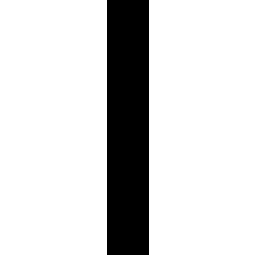

In [1]:
import FunctionalImagesBase

-- The function to genrate a vertical strip
vstrip :: FImage Bool
vstrip (x, y) = abs x < 0.5 

-- /Create the image
myImage :: Picture
myImage = generateImageR2 vstrip (-3, -3) (3, 3) 255

-- Current Directroy is /home/roland/Projekte/FunctionalImages/notebooks
writePng "../images/vstrip.png" myImage

myImage

## Chessboard

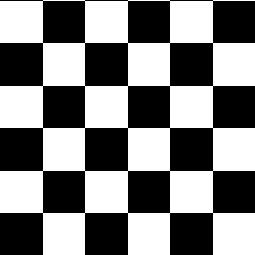

In [2]:
import FunctionalImagesBase

-- Create the image
myImage :: Picture
myImage = generateImageR2 checker (-3, -3) (3, 3) 255

writePng "../images/checker.png" myImage

myImage

## Alternate Concentric Rings



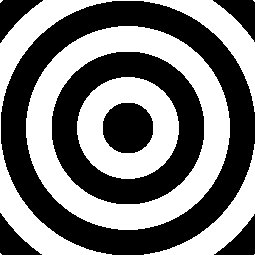

In [3]:
import FunctionalImagesBase

-- | alternate concentric Rings
altRings :: FImage Bool
altRings  = even . floor . dist0

myImage :: Picture
myImage = generateImageR2 altRings (-5, -5) (5, 5) 255

writePng "../images/altRings.png" myImage
myImage


## Polar Checkboard

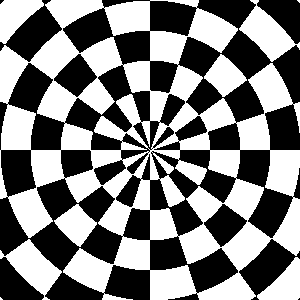

In [4]:
import FunctionalImagesBase

-- | Polar Checkboard
polarChecker :: Int -> FImage Bool
polarChecker n = checker . sc . toPolar
   where
     sc (r,a) = (r,a * fromIntegral n / pi)

myImage :: Picture
myImage = generateImageR2 (polarChecker 10) (-5, -5) (5, 5) 300

writePng "../images/polarChecker.png" myImage
myImage

## Wave Distance

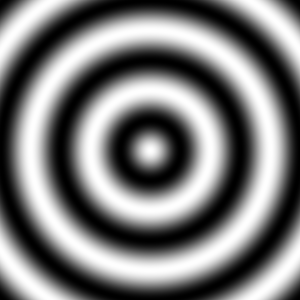

In [4]:
import FunctionalImagesBase


-- | waveDist
wavDist :: FImage Frac
wavDist p = (1 + cos (pi * dist0 p)) / 2

myImage :: Picture
myImage = generateImageR2 wavDist (-5, -5) (5, 5) 300

writePng "../images/wavDist.png" myImage
myImage

## Sierpinski Triangle

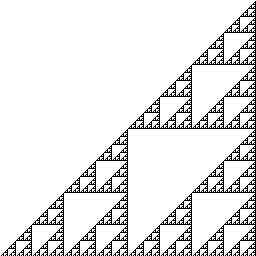

In [6]:
import FunctionalImagesBase
import Data.Bits

-- | sierpinski - An other way to draw a sierpinski triangle
sierpinski :: FImage Bool
sierpinski (x , y) = (abs ix) .|. (abs iy) == abs ix
  where
    ix = round x
    iy = round y

myImage :: Picture
myImage = generateImageR2 sierpinski (0,0) (256, 256) 256
writePng "../images/sierpinski.png" myImage
myImage

## First Color Image

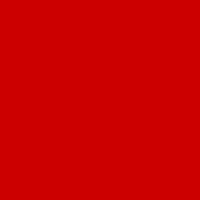

In [7]:
import FunctionalImagesBase

myImage :: Picture
myImage = generateImageR2 darkRed (0,0) (1,1) 200
   where 
     darkRed :: FImage Color
     darkRed _ = darken 0.2 red
     
writePng "../images/firstcolor.png" myImage  

myImage


## 2-dimensional Interpolation

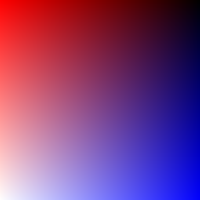

In [8]:
import FunctionalImagesBase

bilerpBRBW :: FImage Color
bilerpBRBW = bilerpC black red blue white

myImage :: Picture
myImage = generateImageR2 bilerpBRBW (0,0) (1,1) 200
     
writePng "../images/bilerpBRBW.png" myImage  

myImage

## Clored Polar Chessboard

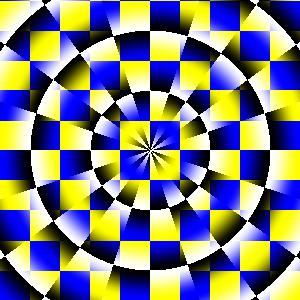

In [7]:
import FunctionalImagesBase

-- | waveDist
wavDist :: FImage Frac
wavDist p = (1 + cos (pi * dist0 p)) / 2

blackWhiteIm, blueYellowIm :: Region -> ImageC
blackWhiteIm reg = cond reg blackI whiteI
blueYellowIm reg = cond reg blueI yellowI

coloredPolarChess :: ImageC
coloredPolarChess = lerpI wavDist(blackWhiteIm (polarChecker 10)) (blueYellowIm checker )

myImage :: Picture
myImage = generateImageR2 coloredPolarChess (-5, -5) (5, 5) 300

writePng "../images/coloredPolarChess.png" myImage 

myImage